#### Chuẩn bị data: các bước giống với lúc trích xuất data cho tập train

B1: Tạo 1 folder đặt tên data_testing là thư mục con của data_testing<br/>
B2: Download video testing và lưu vào folder đó

In [1]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import mediapipe as mp
import pandas as pd
import os, sys
import warnings

# Thêm đường dẫn dẫn đến thư mục cha
sys.path.append(os.path.abspath(".."))
warnings.filterwarnings("ignore")

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

from utils.common import load_model

In [2]:
# Load model
RF_model = load_model('./best_models/RF_model.pkl')

# Load input scaler
input_scaler = load_model("./best_models/input_scaler.pkl")

### 1. Determine important landmarks for plank

In [3]:
def get_class(encode_label: float):
    return {
        0: "C",
        1: "W"
    }.get(encode_label, "Unknown")

#### Testing

In [4]:
test_df = pd.read_csv("test.csv")
test_df = test_df.drop(columns=["predicted_label"])

In [5]:
test_df.shape

(250, 52)

In [6]:
test_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,W,-0.256765,0.021881,-0.038935,-0.198673,-0.004116,-0.186299,-0.184768,-0.069650,0.154143,...,0.009855,0.290880,0.024674,0.162834,0.284634,0.145114,-0.040107,0.274761,0.122990,0.122431
1,W,-0.217836,0.124521,-0.004481,-0.193281,0.067949,-0.175090,-0.183209,-0.026451,0.172888,...,0.006170,0.282399,0.077444,0.163254,0.271009,0.191648,-0.031225,0.263946,0.169618,0.117900
2,C,-0.225044,0.115809,-0.011363,-0.196906,0.052607,-0.185622,-0.186591,-0.026596,0.174889,...,-0.001442,0.286022,0.068080,0.184246,0.278392,0.180695,-0.045759,0.268022,0.155772,0.137191
3,W,-0.231485,0.124323,0.017319,-0.193045,0.066803,-0.169321,-0.185043,-0.028312,0.181770,...,-0.010971,0.290992,0.069753,0.137758,0.284496,0.188562,-0.050493,0.279847,0.170091,0.090654
4,C,-0.252203,0.102226,-0.009244,-0.195240,0.059824,-0.187060,-0.178327,-0.015473,0.185724,...,0.007530,0.287677,0.089827,0.172385,0.275057,0.199608,-0.037385,0.272374,0.190462,0.129277


In [7]:
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

#### Chuẩn hoá dữ liệu

In [8]:
X_test = input_scaler.transform(X_test)

In [9]:
X_test

array([[-1.36706054,  0.0339327 ,  0.5178019 , ...,  1.43756657,
         0.09725124, -0.13765069],
       [-1.15981696,  1.21136868,  0.7990647 , ...,  1.38284825,
         0.95530522, -0.15864681],
       [-1.1981926 ,  1.11143558,  0.74288745, ...,  1.40347275,
         0.70050062, -0.06924783],
       ...,
       [ 1.17782911, -1.17383746,  0.36284949, ..., -1.38966728,
        -1.35322185, -1.20374881],
       [ 1.16235237, -1.35538513,  0.15956914, ..., -1.379825  ,
        -1.35976126, -1.1881742 ],
       [ 1.15864779, -1.48889753,  0.20717758, ..., -1.37006248,
        -1.36762786, -1.19445948]])

In [10]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [16]:
y_pred = RF_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

In [12]:
accuracy

0.84

In [13]:
test_df

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,W,-0.256765,0.021881,-0.038935,-0.198673,-0.004116,-0.186299,-0.184768,-0.069650,0.154143,...,0.009855,0.290880,0.024674,0.162834,0.284634,0.145114,-0.040107,0.274761,0.122990,0.122431
1,W,-0.217836,0.124521,-0.004481,-0.193281,0.067949,-0.175090,-0.183209,-0.026451,0.172888,...,0.006170,0.282399,0.077444,0.163254,0.271009,0.191648,-0.031225,0.263946,0.169618,0.117900
2,C,-0.225044,0.115809,-0.011363,-0.196906,0.052607,-0.185622,-0.186591,-0.026596,0.174889,...,-0.001442,0.286022,0.068080,0.184246,0.278392,0.180695,-0.045759,0.268022,0.155772,0.137191
3,W,-0.231485,0.124323,0.017319,-0.193045,0.066803,-0.169321,-0.185043,-0.028312,0.181770,...,-0.010971,0.290992,0.069753,0.137758,0.284496,0.188562,-0.050493,0.279847,0.170091,0.090654
4,C,-0.252203,0.102226,-0.009244,-0.195240,0.059824,-0.187060,-0.178327,-0.015473,0.185724,...,0.007530,0.287677,0.089827,0.172385,0.275057,0.199608,-0.037385,0.272374,0.190462,0.129277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,W,0.215698,0.009627,-0.023060,0.143048,-0.062388,0.150789,0.159746,-0.020879,-0.149386,...,0.217685,-0.253686,0.010672,-0.062397,-0.256523,0.084936,0.180519,-0.274308,0.102692,-0.115146
246,W,0.214392,-0.066406,-0.011970,0.142178,-0.110201,0.160960,0.156026,-0.077775,-0.123567,...,0.155954,-0.257075,-0.033663,-0.060843,-0.265878,0.034307,0.099347,-0.284712,0.049131,-0.121887
247,W,0.221278,-0.083403,-0.057916,0.144372,-0.093770,0.133081,0.154971,-0.077088,-0.119635,...,0.145054,-0.256286,-0.030744,-0.048328,-0.268357,0.029897,0.089242,-0.284073,0.044169,-0.107612
248,W,0.218370,-0.099229,-0.082817,0.146146,-0.088108,0.125116,0.148737,-0.089883,-0.130390,...,0.140693,-0.255841,-0.049266,-0.037895,-0.269599,0.036886,0.082271,-0.282127,0.043814,-0.104251


In [14]:
test_df.insert(0, "predicted_label", label_encoder.inverse_transform(y_pred))

In [15]:
test_df.to_csv("test.csv", index=False)

### Kết luận

In [17]:
cf = confusion_matrix(y_test, y_pred)

array([[ 89,  35],
       [  5, 121]], dtype=int64)

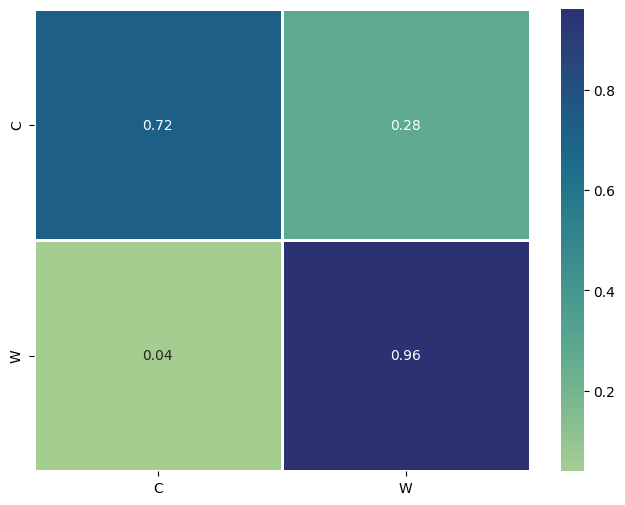

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = np.sum(cf, axis=1)
cf = cf / label_counts[:, None]
cm_cross_val = np.round(cf, 2)
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["C", "W"], columns=["C", "W"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest");